In [29]:
# Intern allows us to access boss resources https://docs.theboss.io/docs/getting-started-intern
# You do not need to modify this cell, it will connect to the bossdb for you. 
from intern.remote.boss import BossRemote
from intern.resource.boss.resource import *
import numpy as np
import configparser
import matplotlib.pyplot as plt

# Setup and connection parameters
connection_params={
    'protocol':'https',
    'host':'api.bossdb.io',
    'token':'public' #allows read access to the general public
}

# Dataset dimensions are z:[0,720], y:[0,1420], x:[0,5805]
# Data beyond these ranges will be padded with 0 values
#BossDB access uses an [inclusive_index,exclusive_index] format, so [0,10] specifies 10 index values 0-9
data_params={
    'prasad_coll':'prasad',
    'prasad_exp' : 'prasad2020',
    'prasad_channel' : 'image',
    'pixel_annotation_channel': 'pixel_annotation',
    'roi_channel': 'region_of_interest',
    'roi_interp_channel': 'roi_interpolated',
    'prasad_coord' : 'prasad_prasad2020',
    'prasad_res' : 0, #Native resolution of dataset is 1.17um, 1.17um, 1.17um per voxel=
}

#create connection objects
rmt = BossRemote(connection_params)
chan_raw = ChannelResource(data_params['prasad_channel'], data_params['prasad_coll'], data_params['prasad_exp'],
                             'annotation', datatype='uint8', sources=data_params['prasad_channel'])
chan_roi_interp = ChannelResource(data_params['roi_interp_channel'], data_params['prasad_coll'], data_params['prasad_exp'],
                             'annotation', datatype='uint64', sources=data_params['prasad_channel'])

(180, 355, 1451)


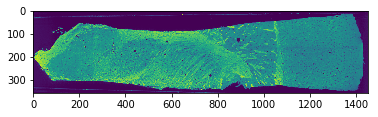

In [35]:
#Pull low-resoution version of dataset for quick visualization of data including Interpolated Regions of Interest (ROI)
#    Labels
#    "Clear Label" = 0
#    "cortex" = 1
#    "striatum" = 2
#    "trn" = 3
#    "vp" = 4
#    "zona incerta" = 5
#    "internal capsule" = 6
#    "hypothalamus" = 7
#    "corpus callosum" = 8
#This is useful for quick access and visualization

# Dataset dimensions are z:[0,720], y:[0,1420], x:[0,5805]
#Pull the entire dataset at a lower resolution version- you can select integer values of res from 0 to 7
res = 2
if res>0:
    xrange = [0,int(5805/(2*res))]
    yrange = [0,int(1420/(2*res))]
    zrange = [0,int(720/(2*res))]
else:
    #Standard resolution
    xrange = [0,5805]
    yrange = [0,1420]
    zrange = [0,720]

#Get the ROI Annotation from bossDB
low_res_raw_cutout_data = rmt.get_cutout(chan_raw, res, xrange, yrange, zrange)
print(low_res_raw_cutout_data.shape) #Data are Z,Y,X, this is the shape of the downsampled data
plt.imshow(np.squeeze(low_res_raw_cutout_data[150,:,:]))

8.0
0.0
(180, 355, 1451)


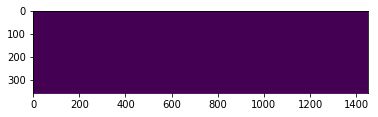

In [32]:
#Pull low-resoution version of dataset for quick visualization of data including Interpolated Regions of Interest (ROI)
#    Labels
#    "Clear Label" = 0
#    "cortex" = 1
#    "striatum" = 2
#    "trn" = 3
#    "vp" = 4
#    "zona incerta" = 5
#    "internal capsule" = 6
#    "hypothalamus" = 7
#    "corpus callosum" = 8
#This is useful for quick access and visualization

# Dataset dimensions are z:[0,720], y:[0,1420], x:[0,5805]
#Pull the entire dataset at a lower resolution version- you can select integer values of res from 0 to 7
res = 2
if res>0:
    xrange = [0,int(5805/(2*res))]
    yrange = [0,int(1420/(2*res))]
    zrange = [0,int(720/(2*res))]
else:
    #Standard resolution
    xrange = [0,5805]
    yrange = [0,1420]
    zrange = [0,720]

#Get the ROI Annotation from bossDB
low_res_roi_cutout_data = rmt.get_cutout(chan_roi_interp, res, xrange, yrange, zrange)
print(np.max(low_res_roi_cutout_data))
print(np.min(low_res_roi_cutout_data))
print(low_res_roi_cutout_data.shape) #Data are Z,Y,X, this is the shape of the downsampled data
plt.imshow(np.squeeze(low_res_roi_cutout_data[150,:,:]))

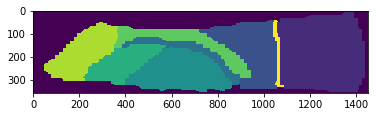